In [1]:
%pip install torch transformers timm einops datasets bitsandbytes accelerate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 25.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.w

In [2]:
pip install flash-attn --no-build-isolation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 37.9 MB/s eta 0:00:00
  Created wheel for flash-attn: filename=flash_attn-2.5.8-cp310-cp310-linux_x86_64.whl size=120922965 sha256=13454dd3d37cf173649bd389b84614b8072fb283f8f2fd23a65ab66caafc304b
  Stored in directory: /root/.cache/pip/wheels/9b/5b/2b/dea8af4e954161c49ef1941938afcd91bb93689371ed12a226
Successfully built flash-attn


In [11]:
import torch
import requests
from io import BytesIO
from PIL import Image
from transformers import AutoTokenizer, AutoModelForCausalLM
from IPython.display import display

DEVICE = "cuda"
DTYPE = torch.float32 if DEVICE == "cpu" else torch.float16
MD_REVISION = "2024-05-20"

tokenizer = AutoTokenizer.from_pretrained("vikhyatk/moondream2")
moondream = AutoModelForCausalLM.from_pretrained("gaodrew/moondream-image2prompt-v1", trust_remote_code=True,
    torch_dtype=DTYPE
)
moondream.to(DEVICE)
moondream.eval()


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/403 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.73G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

Moondream(
  (vision_encoder): VisionEncoder(
    (encoder): EncoderWrapper(
      (model): ModuleDict(
        (visual): VisionTransformer(
          (patch_embed): LinearPatchEmbedding(
            (linear): Linear(in_features=588, out_features=1152, bias=True)
          )
          (blocks): Sequential(
            (0): VitBlock(
              (attn): Attention(
                (qkv): Linear(in_features=1152, out_features=3456, bias=True)
                (proj): Linear(in_features=1152, out_features=1152, bias=True)
              )
              (mlp): MLP(
                (fc1): Linear(in_features=1152, out_features=4304, bias=True)
                (act): GELU(approximate='tanh')
                (fc2): Linear(in_features=4304, out_features=1152, bias=True)
              )
              (norm1): LayerNorm((1152,), eps=1e-05, elementwise_affine=True)
              (norm2): LayerNorm((1152,), eps=1e-05, elementwise_affine=True)
            )
            (1): VitBlock(
              (a

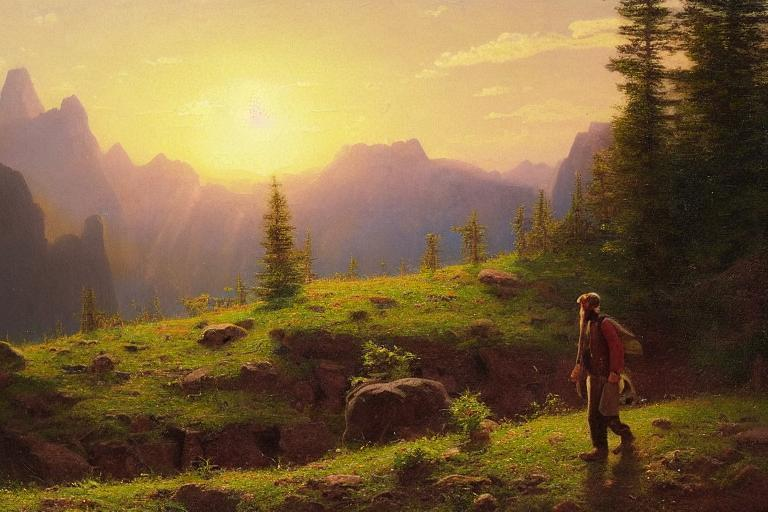

Question: What was the prompt used to generate this image?
Moondream Answer: The prompt was: a lone hiker walking through a beautiful alpine valley at sunset by andrew wyeth, john singer sargent, and norman rockwell, oil on canvas <END> <END><END>!! <END>!!<END>!!!!<END>!!!<END>!!!!!<END>!!!!!!<END>!!!!!<END>!!!!!!!!<END>!!!!!!!!<END>!!!!!!!!!!!<END>!!!!!!!!!<END>!!!!!!!<END>!!!!!!!!!!<END>!!!!!!!<END>!!!!!!!!!!!!!<END>!<END>!!!!!!<END>!!!!<END>!!!!!!!<END>!,<END>!!!,<END>!!!!,<END>!!!!!,<END>!!!!!!,<END>!!!!!,<END>!!!!!!!!!,<END>!!!,<END>.<END>!!!!!!!!!.<END>!!!!!.<END>!!!!!!!!!!!!!.<END>!!!.<END>!!!!!!!!.<END>!!!!!!.<END>!!!!!!!!!!!!!!<END>,<END>!!!!!<END>!!!!<END>!!!!!!!<END>!!!!!!!!!<END>!!!!!!<END>!,!<END>!,!,!,!,!,!!!!,!,!,!,!!!!!!,!,!,!,!!!!!!!!!,!,!,!,!!!!!!!!!!,!,!,!!!!!!!!!!!,!,!!!!!!,!!!!!!,!!!!!!!!!!!,!!!!!!,!!!!!!!!!!,!!!!!!,!!!!,!!!!!!,!!!!!!!!!,!!!!!!,!!!!!!!!!,!!!!!!,!!!!!!!!!!!!!!,!!!!!!,!,!!!!!!!!!!!!!!,!,!,!!!!!!!!!!!!,!!!!!!,!,!!!!,!!!!,!,!!!!,!!!!!!!!,!,!,!!!!!!!!,

In [12]:

image_url = "https://cloud-6b1dpzjwm-hack-club-bot.vercel.app/0image__5_.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert('RGB')

encoded_image = moondream.encode_image(image)

question = "What was the prompt used to generate this image?"

answer = moondream.answer_question(
    encoded_image,
    question,
    tokenizer=tokenizer,
    num_beams=4,
    no_repeat_ngram_size=5,
    early_stopping=True
)

display(image)
print('Question:', question)
print('Moondream Answer:', answer)